## **07-07 기울기 소실(Gradient Vanishing)과 폭주(Exploding)**

https://wikidocs.net/61375

깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생할 수 있습니다. 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됩니다. 이를 **기울기 소실(Gradient Vanishing)** 이라고 합니다.

반대의 경우도 있습니다. 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다. 이를 **기울기 폭주(Gradient Exploding)** 라고 하며, 다음 챕터에서 배울 순환 신경망(Recurrent Neural Network, RNN)에서 쉽게 발생할 수 있습니다. 여기서는 기울기 소실 또는 기울기 폭주를 막는 방법들에 대해서 다룹니다.

### **1. ReLU와 ReLU의 변형들**

앞에서 배운 내용을 간단히 복습해봅시다. 시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워집니다. 그래서 역전파 과정에서 전파 시킬 기울기가 점차 사라져서 입력층 방향으로 갈 수록 제대로 역전파가 되지 않는 기울기 소실 문제가 발생할 수 있습니다.

기울기 소실을 완화하는 가장 간단한 방법은 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것입니다.

* 은닉층에서는 시그모이드 함수를 사용하지 마세요.
* Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결합니다.
* 은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하세요.

### **2. 그래디언트 클리핑(Gradient Clipping)**

그래디언트 클리핑은 말 그대로 기울기 값을 자르는 것을 의미합니다. 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자릅니다. 다시 말해서 임계치만큼 크기를 감소시킵니다. 이는 뒤에서 배울 신경망인 RNN에서 유용합니다. RNN은 역전파 과정에서 시점을 역행하면서 기울기를 구하는데, 이때 기울기가 너무 커질 수 있기 때문입니다. 케라스에서는 다음과 같은 방법으로 그래디언트 클리핑을 수행합니다.

In [1]:
from tensorflow.keras import optimizers

# Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)
Adam = optimizers.Adam(learning_rate=0.0001, clipnorm=1.)

### **3. 가중치 초기화(Weight initialization)**

같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 합니다. 다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있습니다.

#### **1) 세이비어 초기화(Xavier Initialization)**

논문 : http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

2010년 세이비어 글로럿과 요슈아 벤지오는 가중치 초기화가 모델에 미치는 영향을 분석하여 새로운 초기화 방법을 제안했습니다. 이 초기화 방법은 제안한 사람의 이름을 따서 **세이비어(Xavier Initialization) 초기화** 또는 글로럿 초기화(Glorot Initialization)라고 합니다.

이 방법은 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우로 나뉘며, 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세웁니다. 이전 층의 뉴런의 개수를 $n_{in}$, 다음 층의 뉴런의 개수를 $n_{out}$이라고 해봅시다.

글로럿과 벤지오의 논문에서는 균등 분포를 사용하여 가중치를 초기화할 경우 다음과 같은 균등 분포 범위를 사용하라고 합니다.

$$W \sim Uniform(-\sqrt{\frac{6}{ n_{in} + n_{out} }}, +\sqrt{\frac{6}{ n_{in} + n_{out} }})$$

다시 말해 $\sqrt{\frac{6}{ n_{in} + n_{out} }}$를 $m$이라고 하였을 때, $-m$과 $+m$ 사이의 균등 분포를 의미합니다.

정규 분포로 초기화할 경우에는 평균이 0이고, 표준 편차 σ가 다음을 만족하도록 합니다.

$$σ=\sqrt{\frac { 2 }{ n_{ in }+n_{ out } } }$$

세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막습니다. 그런데 세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않습니다. ReLU 함수 또는 ReLU의 변형 함수들을 활성화 함수로 사용할 경우에는 다른 초기화 방법을 사용하는 것이 좋은데, 이를 **He 초기화(He initialization)** 라고 합니다.

#### **2) He 초기화(He initialization)**

논문 : https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf

He 초기화(He initialization)는 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두 가지 경우로 나뉩니다. 다만, He 초기화는 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않습니다. 전과 같이 이전 층의 뉴런의 개수를 $n_{in}$이라고 해봅시다.

He 초기화는 균등 분포로 초기화 할 경우에는 다음과 같은 균등 분포 범위를 가지도록 합니다.
 
 $$W\sim Uniform(- \sqrt{\frac { 6 }{ n_{in} } } , \space\space + \sqrt{\frac { 6 }{ n_{ in } } } )$$
 

정규 분포로 초기화할 경우에는 표준 편차 σ가 다음을 만족하도록 합니다.

$$σ=\sqrt{\frac { 2 }{ n_{ in } } }$$


* 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적입니다.
* ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적입니다.
* ReLU + He 초기화 방법이 좀 더 보편적입니다.

### **4. 배치 정규화(Batch Normalization)**
ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화시킬 수 있지만, 이 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있습니다. 기울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)입니다. 배치 정규화는 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.

#### **1) 내부 공변량 변화(Internal Covariate Shift)**
배치 정규화를 이해하기 위해서는 내부 공변량 변화(Internal Covariate Shift)를 이해할 필요가 있습니다. 내부 공변량 변화란 학습 과정에서 **층 별로 입력 데이터 분포가 달라지는 현상** 을 말합니다. 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생합니다. 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장합니다. (배치 정규화를 제안한 논문에서는 이렇게 주장했지만, 뒤에 이어서는 이에 대한 반박들이 나오기는 했습니다. 하지만 그 이유가 어찌되었든 배치 정규화가 학습을 돕는다는 것은 명백합니다.)

* 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미합니다.
* 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미합니다.

#### **2) 배치 정규화(Batch Normalization)**

배치 정규화(Batch Normalization)는 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것을 말합니다. 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행됩니다. 배치 정규화를 요약하면 다음과 같습니다. 입력에 대해 평균을 0으로 만들고, 정규화를 합니다. 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행합니다. 이때 두 개의 매개변수 γ와 β를 사용하는데, γ는 스케일을 위해 사용하고, β는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달되게 합니다.

배치 정규화의 수식은 다음과 같습니다. 아래에서 $BN$은 배치 정규화를 의미합니다.

input : 미니 배치 $B = \{{x}^{(1)}, {x}^{(2)}, ..., {x}^{(m)}\}$  
  
Output : $y^{(i)} = BN_{γ, β}(x^{(i)})$

$$μ_{B} ← \frac{1}{m} \sum_{i=1}^{m} x^{(i)}    \text{ 미니 배치에 대한 평균 계산}$$

$$σ^2_{B} ← \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - μ_{B})^{2}\text{ 미니 배치에 대한 분산 계산}$$

$$\hat{x}^{(i)} ← \frac{x^{(i)} - μ_{B}}{\sqrt{σ^2_{B}+ε}}\text{ 정규화}$$

$$y^{(i)} ← γ\hat{x}^{(i)} + β = BN_{γ, β}(x^{(i)}) \text{  스케일 조정(γ)과 시프트(β)를 통한 선형 연산}$$

* $m$은 미니 배치에 있는 샘플의 수
* $μ_{B}$는 미니 배치 $B$에 대한 평균.
* $σ_{B}$는 미니 배치 $B$에 대한 표준편차.
* $\hat{x}^{(i)}$은 평균이 0이고 정규화 된 입력 데이터.
* $ε$은 $σ^{2}$가 0일 때, 분모가 0이 되는 것을 막는 작은 양수. 보편적으로 $10^{-5}$
* $γ$는 정규화 된 데이터에 대한 스케일 매개변수로 학습 대상
* $β$는 정규화 된 데이터에 대한 시프트 매개변수로 학습 대상
* $y^{(i)}$는 스케일과 시프트를 통해 조정한 $BN$의 최종 결과

배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화를 합니다.

* 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.
* 가중치 초기화에 훨씬 덜 민감해집니다.
* 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.
* 미니 배치마다 평균과 표준편차를 계산하여 사용하므로 훈련 데이터에 일종의 잡음 주입의 부수 효과로 과적합을 방지하는 효과도 냅니다. 다시 말해, 마치 드롭아웃과 비슷한 효과를 냅니다. 물론, 드롭 아웃과 함께 사용하는 것이 좋습니다.
* 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요합니다.
* 배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 있습니다. : 

    https://arxiv.org/pdf/1805.11604.pdf

#### **3) 배치 정규화의 한계**
배치 정규화는 뛰어난 방법이지만 몇 가지 한계가 존재합니다.

**1. 미니 배치 크기에 의존적이다.**

배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있습니다. 단적으로 배치 크기를 1로 하게되면 분산은 0이 됩니다. 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있습니다. 배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 좋습니다. 이처럼 배치 정규화는 배치 크기에 의존적인 면이 있습니다.

**2. RNN에 적용하기 어렵다.**

뒤에서 배우겠지만, RNN은 각 시점(time step)마다 다른 통계치를 가집니다. 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만듭니다. RNN에서 배치 정규화를 적용하기 위한 몇 가지 논문이 제시되어 있지만, 여기서는 이를 소개하는 대신 배치 크기에도 의존적이지 않으며, RNN에도 적용하는 것이 수월한 층 정규화(layer normalization)라는 방법을 소개하고자 합니다.

### **5. 층 정규화(Layer Normalization)**

층 정규화를 이해하기에 앞서 배치 정규화를 시각화해보겠습니다. 다음은 $m$이 3이고, 특성의 수가 4일 때의 배치 정규화를 보여줍니다. 미니 배치란 동일한 특성(feature) 개수들을 가진 다수의 샘플들을 의미함을 상기합시다.

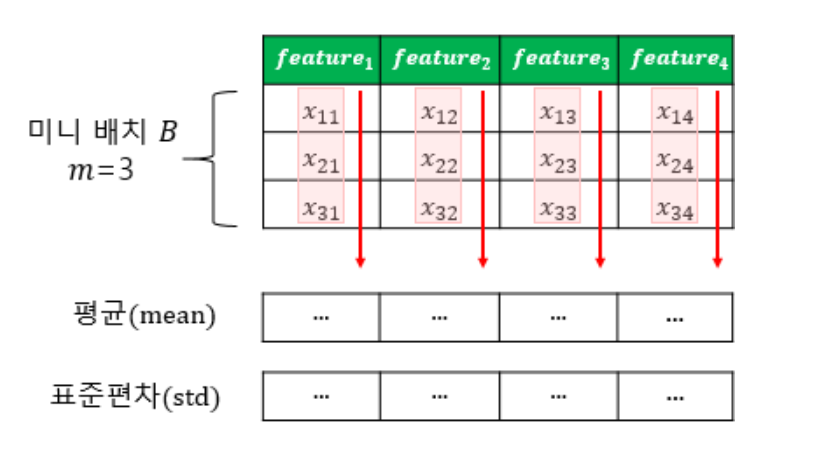

반면, 층 정규화는 다음과 같습니다.

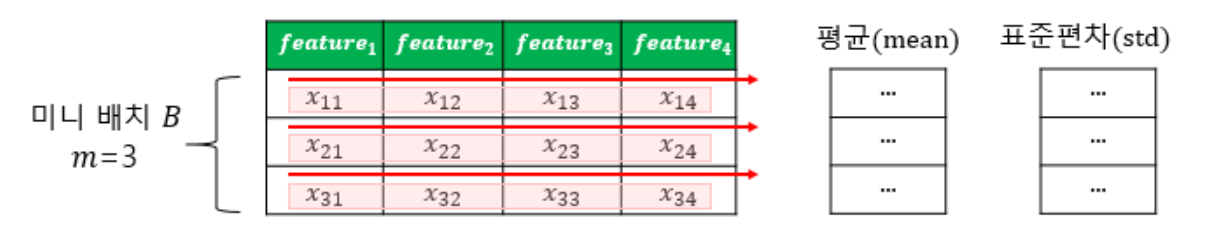

마지막 편집일시 : 2022년 11월 14일 2:50 오후